In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
sns.reset_defaults
sns.set_style(style='darkgrid')
import matplotlib.pyplot as plt
plt.rcParams["patch.force_edgecolor"] = True
plt.ion()
%matplotlib inline
font = {'size'   : 16}
plt.rc('font', **font)

/Users/jeremymiller/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
balance_df = pd.read_csv('data/balance.csv')

In [3]:
balance_df.set_index('Unnamed: 0', inplace=True)

In [4]:
balance_df = sm.add_constant(balance_df)

In [5]:
balance_df.head(10)

,const,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
Unnamed: 0,,,,,,,,,,,,
1,1.0,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333
2,1.0,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903
3,1.0,104.593,7075,514,4,71,11,Male,No,No,Asian,580
4,1.0,148.924,9504,681,3,36,11,Female,No,No,Asian,964
5,1.0,55.882,4897,357,2,68,16,Male,No,Yes,Caucasian,331
6,1.0,80.180,8047,569,4,77,10,Male,No,No,Caucasian,1151
7,1.0,20.996,3388,259,2,37,12,Female,No,No,African American,203
8,1.0,71.408,7114,512,2,87,9,Male,No,No,Asian,872
9,1.0,15.125,3300,266,5,66,13,Female,No,No,Caucasian,279


In [6]:
balance_df.describe()

,const,Income,Limit,Rating,Cards,Age,Education,Balance
count,400.0,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,1.0,45.218885,4735.600000,354.940000,2.957500,55.667500,13.450000,520.015000
std,0.0,35.244273,2308.198848,154.724143,1.371275,17.249807,3.125207,459.758877
min,1.0,10.354000,855.000000,93.000000,1.000000,23.000000,5.000000,0.000000
25%,1.0,21.007250,3088.000000,247.250000,2.000000,41.750000,11.000000,68.750000
50%,1.0,33.115500,4622.500000,344.000000,3.000000,56.000000,14.000000,459.500000
75%,1.0,57.470750,5872.750000,437.250000,4.000000,70.000000,16.000000,863.000000
max,1.0,186.634000,13913.000000,982.000000,9.000000,98.000000,20.000000,1999.000000


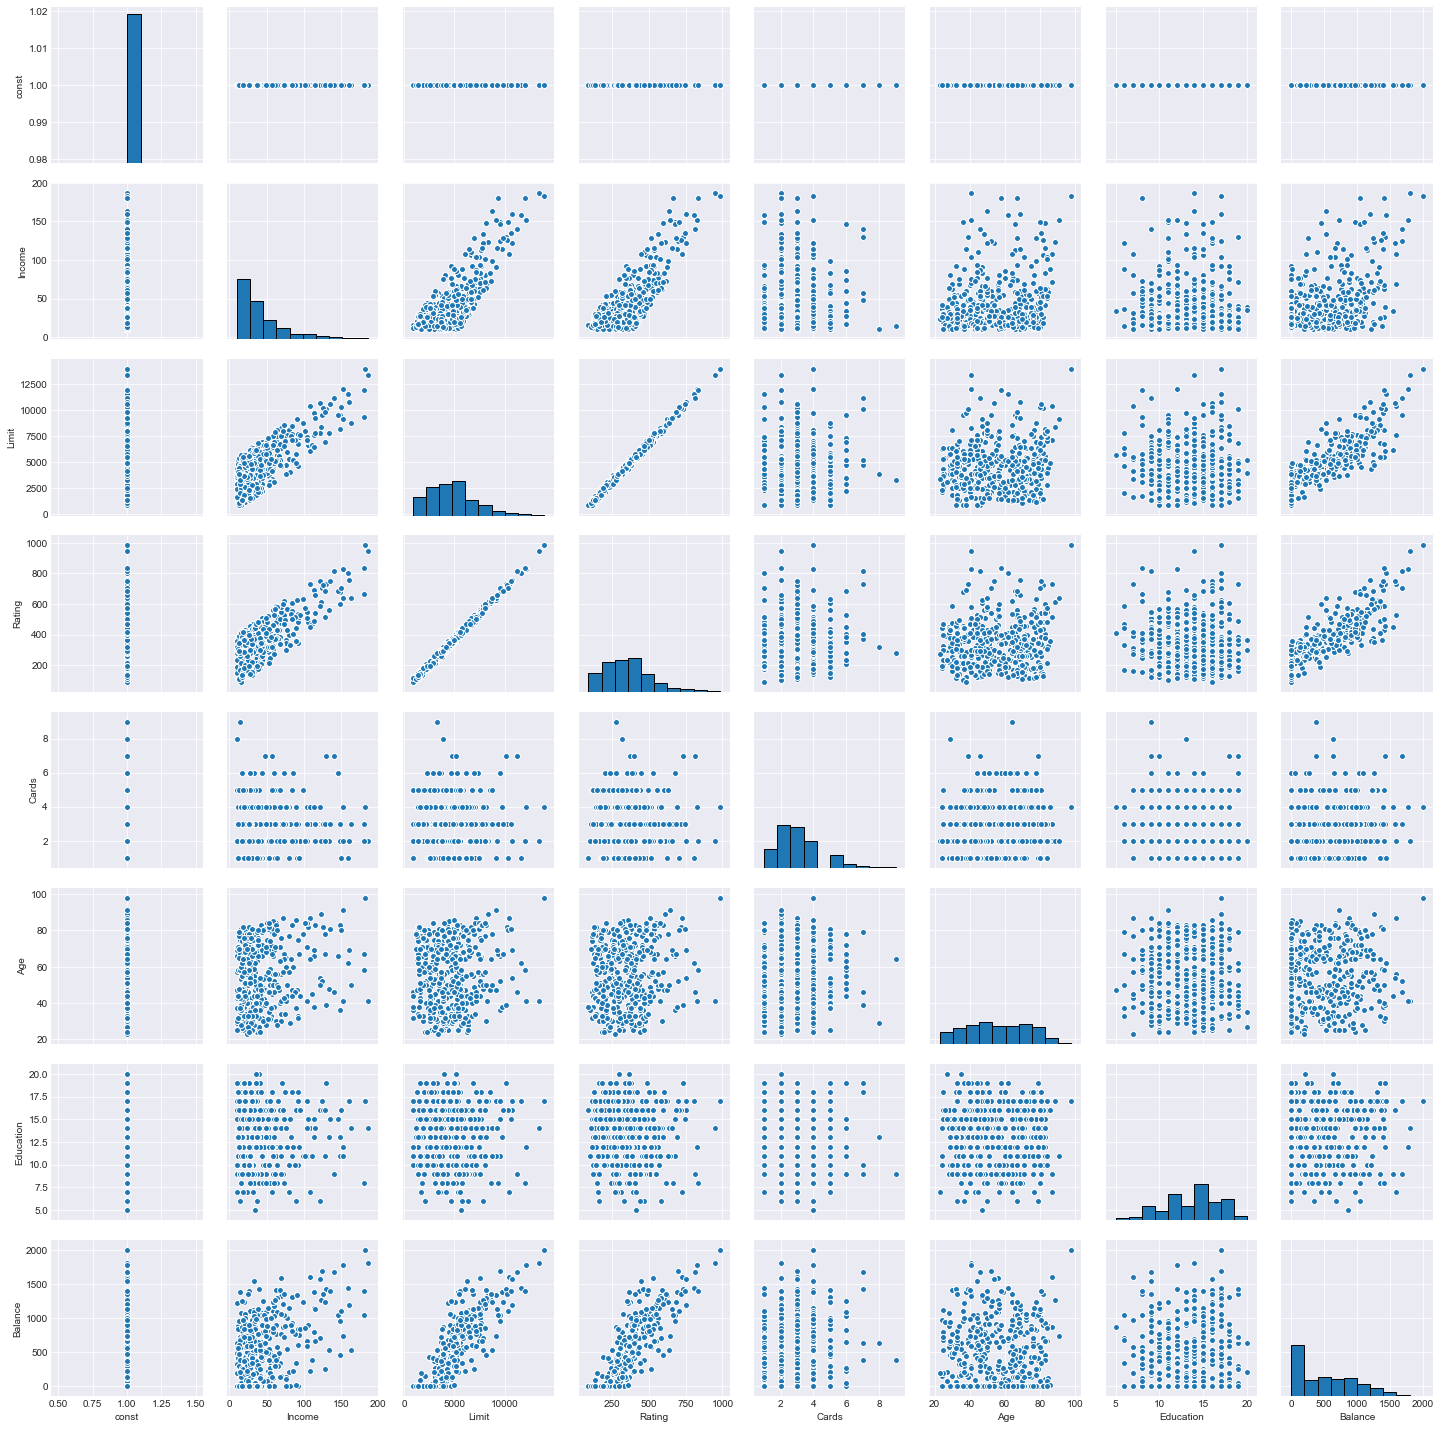

In [7]:
sns.pairplot(balance_df)

Looking at the scatter matrix, numerous linear or approximately linear relationships exist. The following features are approximately linearly correlated with balance:  

* Limit
* Rating
* Income, to a lesser degree

In [8]:
balance_df = pd.get_dummies(balance_df, columns = ['Gender', 'Student', 'Married'], 
                            prefix = ['Gender', 'Student', 'Married'], drop_first=True)

In [9]:
balance_df.head()

,const,Income,Limit,Rating,Cards,Age,Education,Ethnicity,Balance,Gender_Female,Student_Yes,Married_Yes
Unnamed: 0,,,,,,,,,,,,
1,1.0,14.891,3606,283,2,34,11,Caucasian,333,0,0,1
2,1.0,106.025,6645,483,3,82,15,Asian,903,1,1,1
3,1.0,104.593,7075,514,4,71,11,Asian,580,0,0,0
4,1.0,148.924,9504,681,3,36,11,Asian,964,1,0,0
5,1.0,55.882,4897,357,2,68,16,Caucasian,331,0,0,1


In [10]:
balance_df['Ethnicity'].unique()

array(['Caucasian', 'Asian', 'African American'], dtype=object)

In [11]:
balance_df = pd.get_dummies(balance_df, columns=['Ethnicity'], drop_first=True)

In [12]:
balance_df.head()

,const,Income,Limit,Rating,Cards,Age,Education,Balance,Gender_Female,Student_Yes,Married_Yes,Ethnicity_Asian,Ethnicity_Caucasian
Unnamed: 0,,,,,,,,,,,,,
1,1.0,14.891,3606,283,2,34,11,333,0,0,1,0,1
2,1.0,106.025,6645,483,3,82,15,903,1,1,1,1,0
3,1.0,104.593,7075,514,4,71,11,580,0,0,0,1,0
4,1.0,148.924,9504,681,3,36,11,964,1,0,0,1,0
5,1.0,55.882,4897,357,2,68,16,331,0,0,1,0,1


In [13]:
balance_model = sm.OLS(balance_df['Balance'], balance_df.drop('Balance', axis=1))
balance_results = balance_model.fit()
balance_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Balance   R-squared:                       0.955
Model:                            OLS   Adj. R-squared:                  0.954
Method:                 Least Squares   F-statistic:                     750.3
Date:                Thu, 27 Sep 2018   Prob (F-statistic):          1.11e-253
Time:                        19:10:04   Log-Likelihood:                -2398.7
No. Observations:                 400   AIC:                             4821.
Df Residuals:                     388   BIC:                             4869.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                -479.2079     35.774    -13.395      0.000    -549.543    -408.873
Income                 -7.8031      0.234    -33.314      0.000      -8.264      -7.343
Limit                   0.1909      0.033      5.824      0.000       0.126       0.255
Rating                  1.1365      0.491      2.315      0.021       0.171       2.102
Cards                  17.7245      4.341      4.083      0.000       9.190      26.259
Age                    -0.6139      0.294     -2.088      0.037      -1.192      -0.036
Education              -1.0989      1.598     -0.688      0.492      -4.241       2.043
Gender_Female         -10.6532      9.914     -1.075      0.283     -30.145       8.839
Student_Yes           425.7474     16.723     25.459      0.000     392.869     458.626
Married_Yes            -8.5339     10.363     -0.824      0.411     -28.908      11.841
Ethnicity_Asian        16.8042     14.119      1.190      0.235     -10.955      44.564
Ethnicity_Caucasian    10.1070     12.210      0.828      0.408     -13.899      34.113
==============================================================================
Omnibus:                       34.899   Durbin-Watson:                   1.968
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               41.766
Skew:                           0.782   Prob(JB):                     8.52e-10
Kurtosis:                       3.241   Cond. No.                     3.87e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.87e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Text(0,0.5,'Studentized Residuals')

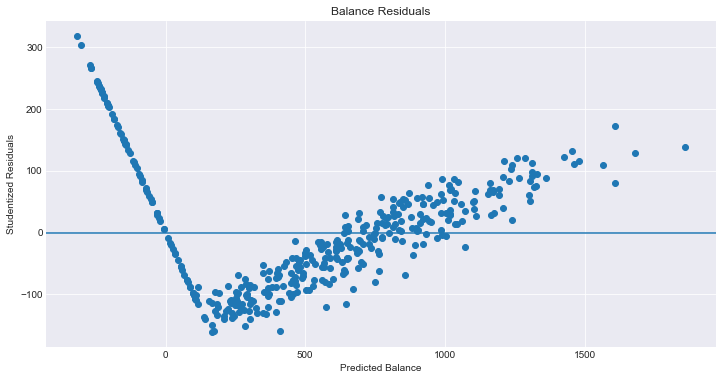

In [14]:
fig, ax  = plt.subplots(figsize=(12,6))

ax.scatter(x=balance_results.fittedvalues, y=balance_results.resid)

ax.axhline(y=0)
ax.set_title("Balance Residuals")
ax.set_xlabel("Predicted Balance")
ax.set_ylabel("Studentized Residuals")

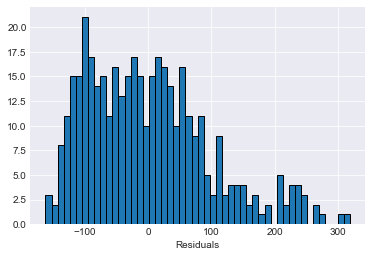

In [15]:
plt.hist(balance_results.resid, bins=50)
plt.xlabel('Residuals')
plt.show()

The assumptions made by the above linear model are:  

* Linearity: the relationship between predictor and response variables is essentially linear.
* Homoscedasticy: The normalized variance across the data is essentially constant
* Normality: Residuals are normally distibuted
* Non-Multicolinearity: The predictor variables are not strongly linearly dependant on one another

Text(0,0.5,'Predicted')

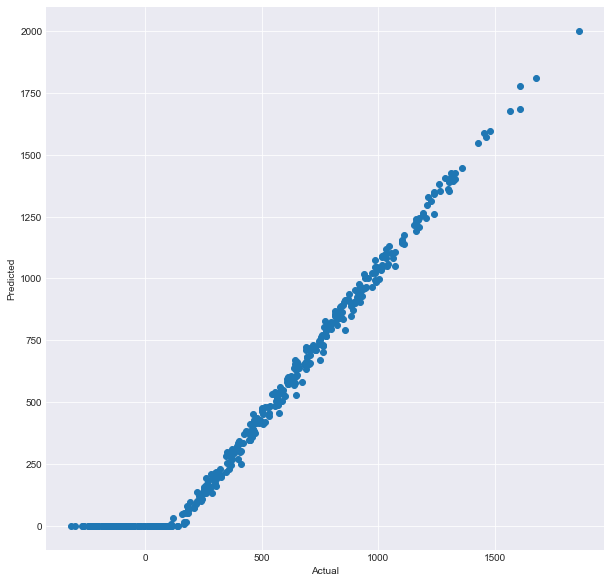

In [16]:
plt.figure(figsize=(10,10))
plt.scatter(y =balance_df['Balance'], x=balance_results.fittedvalues)
plt.xlabel('Actual')
plt.ylabel('Predicted')

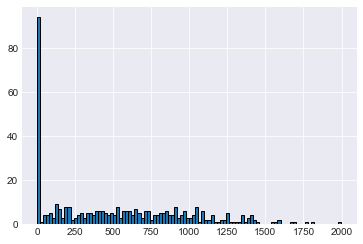

In [17]:
plt.hist(x=balance_df['Balance'], bins=100)
plt.show()

The above histogram demonstrates that the data contain a large number of cases with 0 balance. This could be affecting the accuracy of our model.

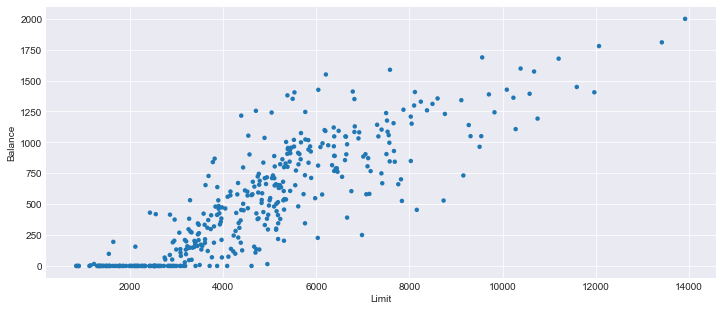

In [18]:
balance_df.plot(kind='scatter', y='Balance', x='Limit', edgecolor='none', figsize=(12, 5))

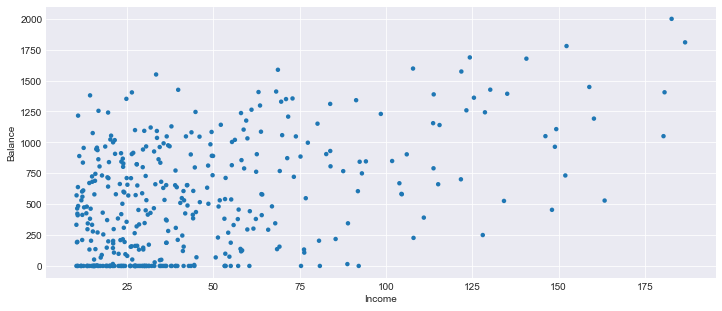

In [19]:
balance_df.plot(kind='scatter', y='Balance', x='Income', edgecolor='none', figsize=(12, 5))

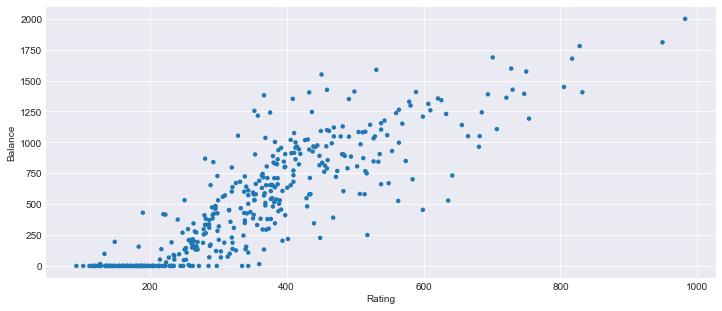

In [20]:
balance_df.plot(kind='scatter', y='Balance', x='Rating', edgecolor='none', figsize=(12, 5))

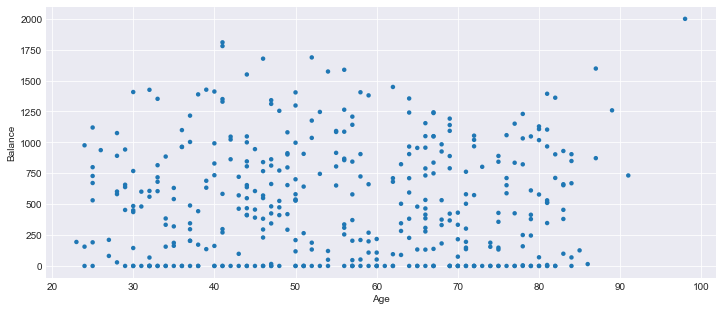

In [21]:
balance_df.plot(kind='scatter', y='Balance', x='Age', edgecolor='none', figsize=(12, 5))

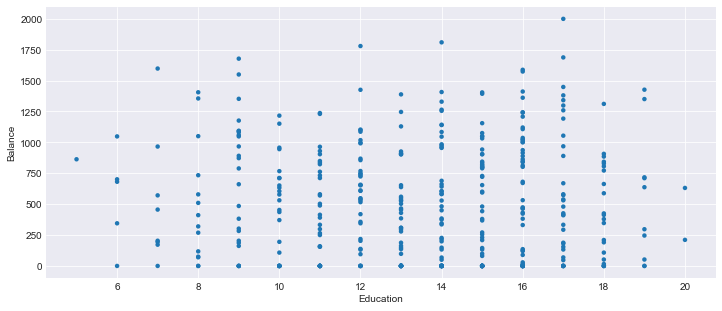

In [22]:
balance_df.plot(kind='scatter', y='Balance', x='Education', edgecolor='none', figsize=(12, 5))

The variables which best separate customers with zero balance from those with non-zero balance are:  

* Limit
* Income
* Rating

The approximate lower limits for separation between zero balance and non-zero balance are:  

* Limit: 3500
* Income: 0
* Rating: 300

In [23]:
balance_df_cleaned = balance_df[(balance_df['Limit'] > 3000) | (balance_df['Rating'] > 250)]
# balance_df_cleaned = balance_df[balance_df['Limit'] > 4000]

In [24]:
balance_df_cleaned = balance_df_cleaned[balance_df_cleaned['Balance']!=0]

In [25]:
balance_df_cleaned.shape

(296, 13)

In [26]:
balance_df_cleaned.head()

,const,Income,Limit,Rating,Cards,Age,Education,Balance,Gender_Female,Student_Yes,Married_Yes,Ethnicity_Asian,Ethnicity_Caucasian
Unnamed: 0,,,,,,,,,,,,,
1,1.0,14.891,3606,283,2,34,11,333,0,0,1,0,1
2,1.0,106.025,6645,483,3,82,15,903,1,1,1,1,0
3,1.0,104.593,7075,514,4,71,11,580,0,0,0,1,0
4,1.0,148.924,9504,681,3,36,11,964,1,0,0,1,0
5,1.0,55.882,4897,357,2,68,16,331,0,0,1,0,1


In [27]:
balance_df.shape

(400, 13)

The cleaned dataframe still contains 296 entries out of an original 400.

In [28]:
balance_df_cleaned[balance_df_cleaned['Balance'] == 0].shape

(0, 13)

In [29]:
balance_model2 = sm.OLS(balance_df_cleaned['Balance'], balance_df_cleaned.drop('Balance', axis=1))
balance_results2 = balance_model2.fit()
balance_results2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Balance   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 4.038e+04
Date:                Thu, 27 Sep 2018   Prob (F-statistic):               0.00
Time:                        19:10:17   Log-Likelihood:                -1110.2
No. Observations:                 296   AIC:                             2244.
Df Residuals:                     284   BIC:                             2289.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                -696.3426      4.500   -154.756      0.000    -705.199    -687.486
Income                 -9.9811      0.030   -330.271      0.000     -10.041      -9.922
Limit                   0.3359      0.004     82.961      0.000       0.328       0.344
Rating                 -0.1465      0.060     -2.451      0.015      -0.264      -0.029
Cards                  25.5986      0.509     50.279      0.000      24.596      26.601
Age                    -1.0013      0.037    -27.414      0.000      -1.073      -0.929
Education               0.0233      0.194      0.120      0.905      -0.359       0.406
Gender_Female           0.6469      1.228      0.527      0.599      -1.770       3.064
Student_Yes           501.4974      2.076    241.572      0.000     497.411     505.584
Married_Yes            -1.9219      1.296     -1.482      0.139      -4.474       0.630
Ethnicity_Asian        -1.5365      1.784     -0.861      0.390      -5.048       1.975
Ethnicity_Caucasian    -0.1980      1.500     -0.132      0.895      -3.150       2.754
==============================================================================
Omnibus:                        3.699   Durbin-Watson:                   2.048
Prob(Omnibus):                  0.157   Jarque-Bera (JB):                3.622
Skew:                          -0.271   Prob(JB):                        0.164
Kurtosis:                       2.989   Cond. No.                     4.43e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.43e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Text(0,0.5,'Studentized Residuals')

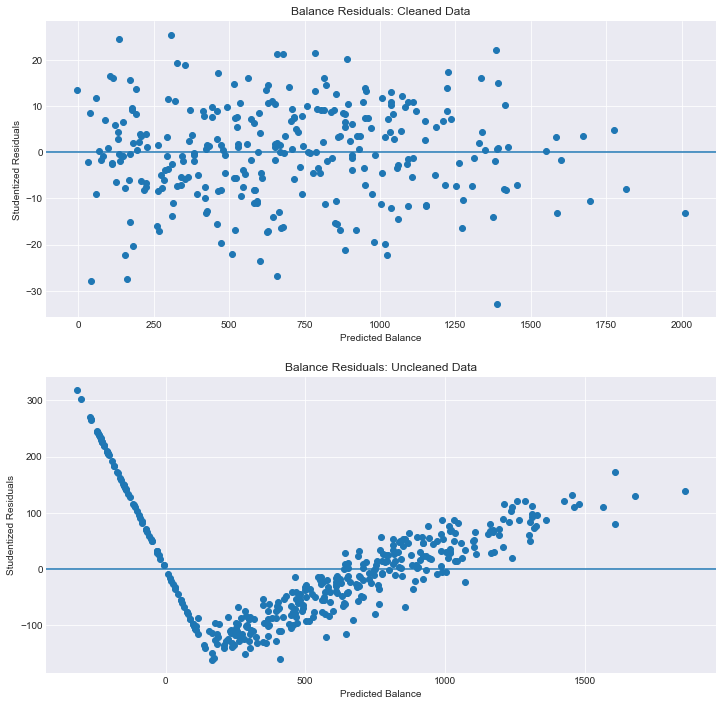

In [30]:
fig, ax  = plt.subplots(2,1,figsize=(12,12))

ax[0].scatter(x=balance_results2.fittedvalues, y=balance_results2.resid)

ax[0].axhline(y=0)
ax[0].set_title("Balance Residuals: Cleaned Data")
ax[0].set_xlabel("Predicted Balance")
ax[0].set_ylabel("Studentized Residuals")

ax[1].scatter(x=balance_results.fittedvalues, y=balance_results.resid)

ax[1].axhline(y=0)
ax[1].set_title("Balance Residuals: Uncleaned Data")
ax[1].set_xlabel("Predicted Balance")
ax[1].set_ylabel("Studentized Residuals")

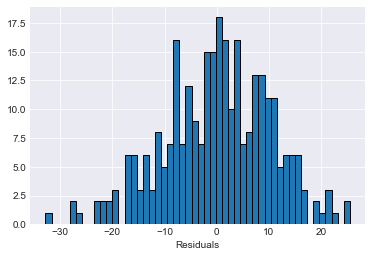

In [31]:
plt.hist(balance_results2.resid, bins=50)
plt.xlabel('Residuals')
plt.show()

Exclude features without statiscally significant beta coefficients.  
Exclude features with high Variance Inflation Factor.  
Exclude features with high colinearity with others already in model.   

Features with high beta coeeficient p-values are:  
* Gender_Female
* Education
* Married
* Ethnicity  

Remaining predictor variables are:
* Income
* Rating
* Limit
* Cards
* Age
* Student

In [32]:
balance_df_cleaned = balance_df_cleaned[['const', 'Income', 'Limit', 'Rating', 'Cards', 'Age', 'Student_Yes', 'Balance']]

In [33]:
balance_df_cleaned.head()

,const,Income,Limit,Rating,Cards,Age,Student_Yes,Balance
Unnamed: 0,,,,,,,,
1,1.0,14.891,3606,283,2,34,0,333
2,1.0,106.025,6645,483,3,82,1,903
3,1.0,104.593,7075,514,4,71,0,580
4,1.0,148.924,9504,681,3,36,0,964
5,1.0,55.882,4897,357,2,68,0,331


In [34]:
balance_model3 = sm.OLS(balance_df_cleaned['Balance'], balance_df_cleaned.drop(columns='Balance', axis=1))
balance_results3 = balance_model3.fit()
balance_results3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Balance   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 7.437e+04
Date:                Thu, 27 Sep 2018   Prob (F-statistic):               0.00
Time:                        19:11:20   Log-Likelihood:                -1112.1
No. Observations:                 296   AIC:                             2238.
Df Residuals:                     289   BIC:                             2264.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        -697.2791      3.416   -204.110      0.000    -704.003    -690.555
Income         -9.9822      0.030   -331.954      0.000     -10.041      -9.923
Limit           0.3363      0.004     84.172      0.000       0.328       0.344
Rating         -0.1526      0.059     -2.586      0.010      -0.269      -0.036
Cards          25.6043      0.505     50.666      0.000      24.610      26.599
Age            -0.9971      0.036    -27.456      0.000      -1.069      -0.926
Student_Yes   501.7646      2.035    246.574      0.000     497.759     505.770
==============================================================================
Omnibus:                        3.489   Durbin-Watson:                   2.053
Prob(Omnibus):                  0.175   Jarque-Bera (JB):                3.535
Skew:                          -0.262   Prob(JB):                        0.171
Kurtosis:                       2.889   Cond. No.                     3.36e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.36e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Text(0,0.5,'Studentized Residuals')

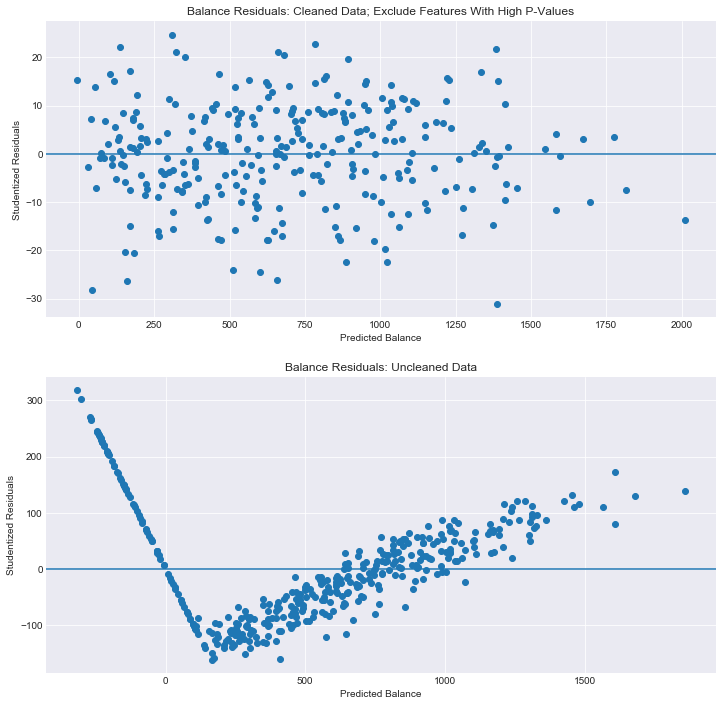

In [35]:
fig, ax  = plt.subplots(2,1,figsize=(12,12))

ax[0].scatter(x=balance_results3.fittedvalues, y=balance_results3.resid)

ax[0].axhline(y=0)
ax[0].set_title("Balance Residuals: Cleaned Data; Exclude Features With High P-Values")
ax[0].set_xlabel("Predicted Balance")
ax[0].set_ylabel("Studentized Residuals")

ax[1].scatter(x=balance_results.fittedvalues, y=balance_results.resid)

ax[1].axhline(y=0)
ax[1].set_title("Balance Residuals: Uncleaned Data")
ax[1].set_xlabel("Predicted Balance")
ax[1].set_ylabel("Studentized Residuals")

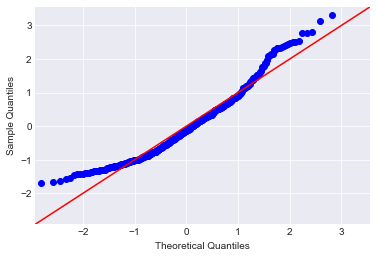

In [36]:
ax = sm.graphics.qqplot(balance_results.outlier_test()['student_resid'], fit=True, line='45')

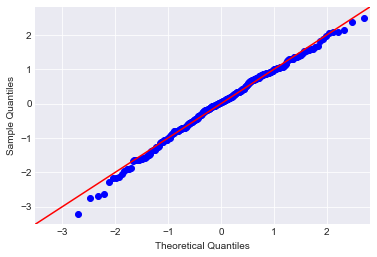

In [37]:
ax = sm.graphics.qqplot(balance_results2.outlier_test()['student_resid'], fit=True, line='45')

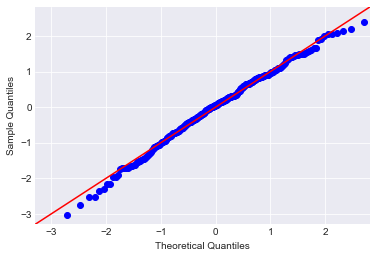

In [38]:
ax = sm.graphics.qqplot(balance_results3.outlier_test()['student_resid'], fit=True, line='45')

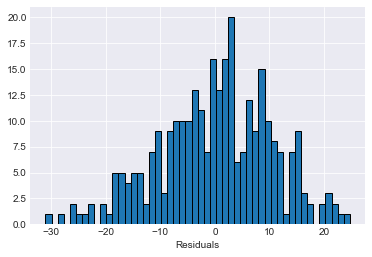

In [39]:
plt.hist(balance_results3.resid, bins=50)
plt.xlabel('Residuals')
plt.show()

In [40]:
HGQ = sm.stats.diagnostic.HetGoldfeldQuandt()
HGQ.run(balance_df_cleaned['Balance'], balance_df_cleaned.drop(
    'Balance', axis=1), idx=1, split=0.5, alternative='two-sided')

(1.0188519791250972, 0.9118635716513804, 'two-sided')

In [41]:
balance_df_cleaned.columns

Index(['const', 'Income', 'Limit', 'Rating', 'Cards', 'Age', 'Student_Yes',
       'Balance'],
      dtype='object')

In [42]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [43]:
X = balance_df_cleaned[['const','Income', 'Limit', 'Cards', 'Age', 'Student_Yes']]
X.head()

,const,Income,Limit,Cards,Age,Student_Yes
Unnamed: 0,,,,,,
1,1.0,14.891,3606,2,34,0
2,1.0,106.025,6645,3,82,1
3,1.0,104.593,7075,4,71,0
4,1.0,148.924,9504,3,36,0
5,1.0,55.882,4897,2,68,0


In [44]:
variance_inflation_factor(X.values, 0)

26.91548994543711

In [45]:
variance_inflation_factor(X.values, 1)

3.5417194151772295

In [46]:
variance_inflation_factor(X.values, 2)

3.4389080264642433

In [47]:
variance_inflation_factor(X.values, 3)

1.0039124252067773

In [48]:
variance_inflation_factor(X.values, 4)

1.064275706810748

In [49]:
variance_inflation_factor(X.values, 5)

1.0075148341218079

In [50]:
X.columns[1]

'Income'

In [51]:
balance_df_cleaned.head()

,const,Income,Limit,Rating,Cards,Age,Student_Yes,Balance
Unnamed: 0,,,,,,,,
1,1.0,14.891,3606,283,2,34,0,333
2,1.0,106.025,6645,483,3,82,1,903
3,1.0,104.593,7075,514,4,71,0,580
4,1.0,148.924,9504,681,3,36,0,964
5,1.0,55.882,4897,357,2,68,0,331


In [52]:
balance_results3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Balance   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 7.437e+04
Date:                Thu, 27 Sep 2018   Prob (F-statistic):               0.00
Time:                        19:13:08   Log-Likelihood:                -1112.1
No. Observations:                 296   AIC:                             2238.
Df Residuals:                     289   BIC:                             2264.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        -697.2791      3.416   -204.110      0.000    -704.003    -690.555
Income         -9.9822      0.030   -331.954      0.000     -10.041      -9.923
Limit           0.3363      0.004     84.172      0.000       0.328       0.344
Rating         -0.1526      0.059     -2.586      0.010      -0.269      -0.036
Cards          25.6043      0.505     50.666      0.000      24.610      26.599
Age            -0.9971      0.036    -27.456      0.000      -1.069      -0.926
Student_Yes   501.7646      2.035    246.574      0.000     497.759     505.770
==============================================================================
Omnibus:                        3.489   Durbin-Watson:                   2.053
Prob(Omnibus):                  0.175   Jarque-Bera (JB):                3.535
Skew:                          -0.262   Prob(JB):                        0.171
Kurtosis:                       2.889   Cond. No.                     3.36e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.36e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

At this point we have a strong model to predict balance.

Predictor variables:
* Income
* Limit
* Rating
* Cards
* Age
* Student Status

Response variable:
* Balance



We have a R-squared value of 0.999, meaning we can explain 99.9% of the variance in balance with our model. The scatter plots and residual plots demonstrate an essentially linear relationship between predictors and response. The data do not violate the condition of Homoscadasticity by the Het Goldfeld Quant test (p-value 0.9), demonstrating that our residuals have essentially constant variance. The Q-Q plot and Jarque-Bera p-value (0.0171) demonstrate that our residuals are essentially normally distributed. Variance Inflation Factors indicated that no predictor variable have a strongly colinear relationship with the others.

The model predicts balance with good accuracy, based on income, limit, rating, cards, age, and student status.